# CCADMACL (Midterm Exam)

## Import the libraries

In [779]:
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from mpl_toolkits.mplot3d import Axes3D

from collections import Counter

## Load the datasets

In [780]:
face_df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXAM/blob/7a460f9db1109ede93e371e663bac0615057de89/dataset/face.csv?raw=true")
chrome_df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXAM/blob/7a460f9db1109ede93e371e663bac0615057de89/dataset/chrome.csv?raw=true")
lines2_df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXAM/blob/7a460f9db1109ede93e371e663bac0615057de89/dataset/lines2.csv?raw=true")
supernova_df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXAM/blob/7a460f9db1109ede93e371e663bac0615057de89/dataset/supernova.csv?raw=true")
network_df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXAM/blob/7a460f9db1109ede93e371e663bac0615057de89/dataset/network.csv?raw=true")
spirals_df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXAM/blob/7a460f9db1109ede93e371e663bac0615057de89/dataset/spirals.csv?raw=true")
densedisk_df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXAM/blob/b6a2e277c58bd723f9c4c1a2873aac30b87f778b/dataset/densedisk.csv?raw=true")
rings_df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXAM/blob/b6a2e277c58bd723f9c4c1a2873aac30b87f778b/dataset/rings.csv?raw=true")
chainlink_df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXAM/blob/b6a2e277c58bd723f9c4c1a2873aac30b87f778b/dataset/chainlink.csv?raw=true")

## Plot the datasets

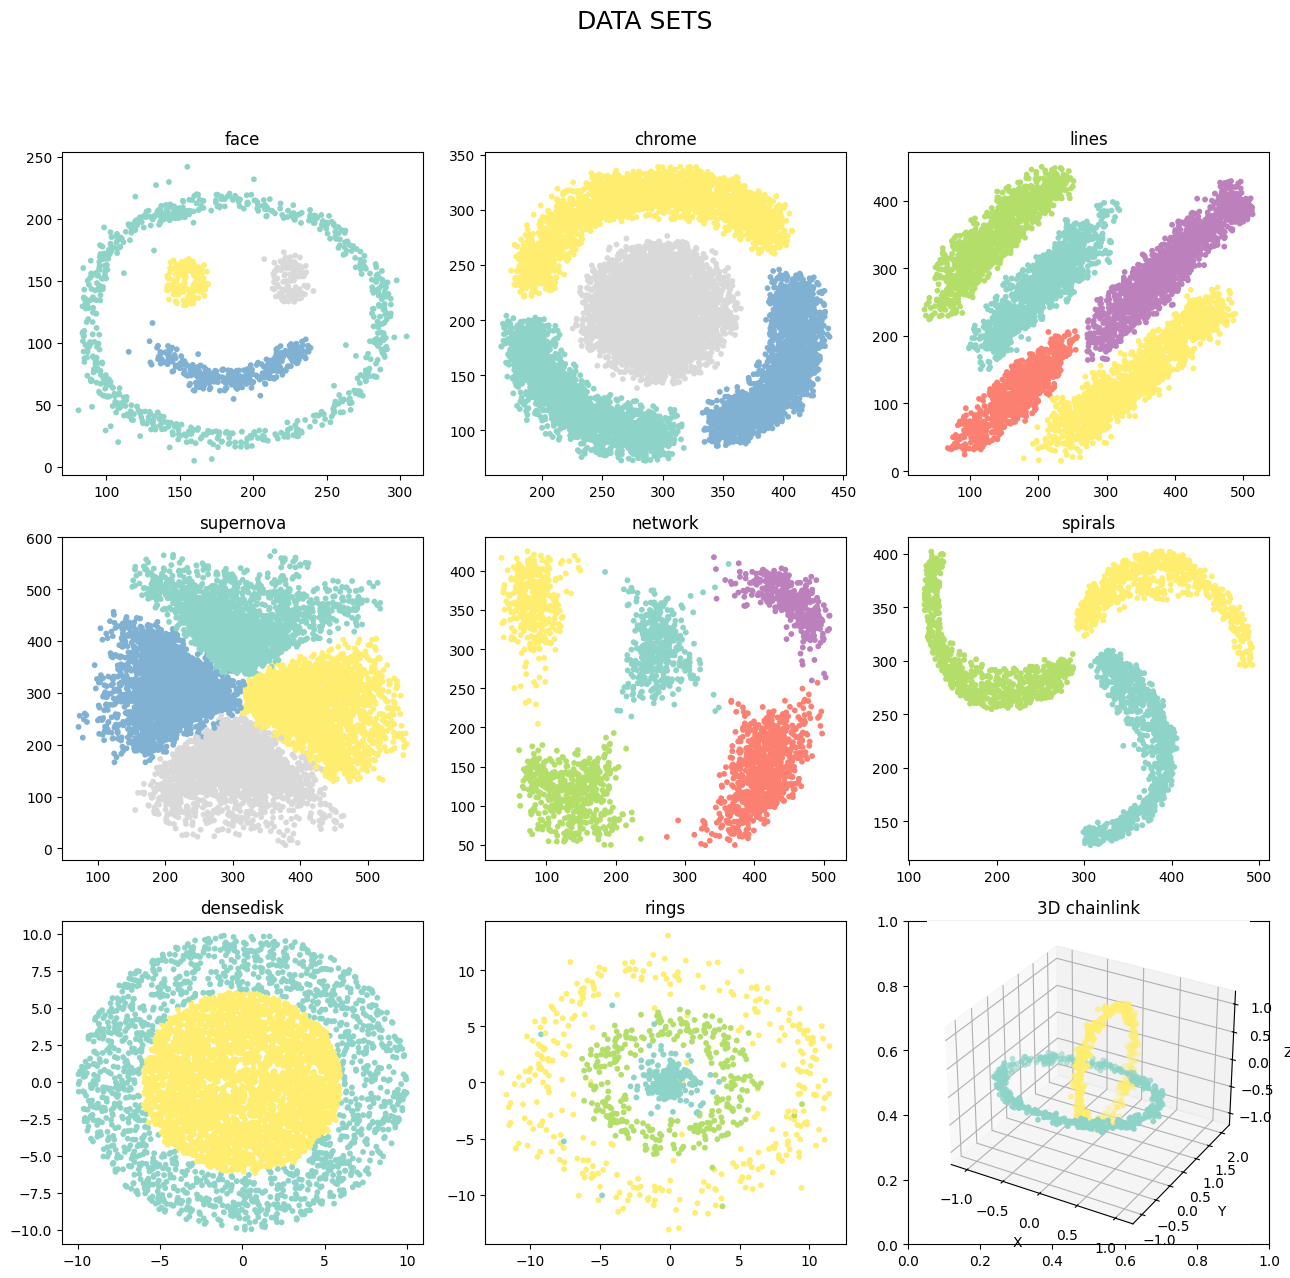

In [781]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(13, 13))
fig.suptitle('DATA SETS\n', size=18)

# Plot the 2D scatterplots
axes[0, 0].scatter(face_df['x'], face_df['y'], c=face_df['color'], s=10, cmap="Set3")
axes[0, 0].set_title("face")

axes[0, 1].scatter(chrome_df['x'], chrome_df['y'], c=chrome_df['color'], s=10, cmap="Set3")
axes[0, 1].set_title("chrome")

axes[0, 2].scatter(lines2_df['x'], lines2_df['y'], c=lines2_df['color'], s=10, cmap="Set3")
axes[0, 2].set_title("lines")

axes[1, 0].scatter(supernova_df['x'], supernova_df['y'], c=supernova_df['color'], s=10, cmap="Set3")
axes[1, 0].set_title("supernova")

axes[1, 1].scatter(network_df['x'], network_df['y'], c=network_df['color'], s=10, cmap="Set3")
axes[1, 1].set_title("network")

axes[1, 2].scatter(spirals_df['x'], spirals_df['y'], c=spirals_df['color'], s=10, cmap="Set3")
axes[1, 2].set_title("spirals")

axes[2, 0].scatter(densedisk_df['x'], densedisk_df['y'], c=densedisk_df['color'], s=10, cmap="Set3")
axes[2, 0].set_title("densedisk")

axes[2, 1].scatter(rings_df['x'], rings_df['y'], c=rings_df['color'], s=10, cmap="Set3")
axes[2, 1].set_title("rings")

# Add a 3D plot
ax3d = fig.add_subplot(3, 3, 9, projection='3d')
ax3d.scatter(chainlink_df['x'], chainlink_df['y'], chainlink_df['z'], c=chainlink_df['color'], cmap="Set3", s=10)
ax3d.set_title("3D chainlink")
ax3d.set_xlabel("X")
ax3d.set_ylabel("Y")
ax3d.set_zlabel("Z")

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])

## A. Use K-means to cluster each dataset

1. Create each copy of the dataset for k-means

In [782]:
face_kmeans_df = face_df.copy()
chrome_kmeans_df = chrome_df.copy()
lines2_kmeans_df = lines2_df.copy()
supernova_kmeans_df = supernova_df.copy()
network_kmeans_df = network_df.copy()
spirals_kmeans_df = spirals_df.copy()
densedisk_kmeans_df = densedisk_df.copy()
rings_kmeans_df = rings_df.copy()
chainlink_kmeans_df = chainlink_df.copy()

2. Drop the "color" column on all datasets

In [783]:
face_kmeans_df = face_kmeans_df.drop(columns=['color'])
chrome_kmeans_df = chrome_kmeans_df.drop(columns=['color'])
lines2_kmeans_df = lines2_kmeans_df.drop(columns=['color'])
supernova_kmeans_df = supernova_kmeans_df.drop(columns=['color'])
network_kmeans_df = network_kmeans_df.drop(columns=['color'])
spirals_kmeans_df = spirals_kmeans_df.drop(columns=['color'])
densedisk_kmeans_df = densedisk_kmeans_df.drop(columns=['color'])
rings_kmeans_df = rings_kmeans_df.drop(columns=['color'])
chainlink_kmeans_df = chainlink_kmeans_df.drop(columns=['color'])

3. Train a K-means model for each dataset.

In [784]:
kmeans_face = KMeans(n_clusters=4, random_state=0)
kmeans_face.fit(face_kmeans_df)

kmeans_chrome = KMeans(n_clusters=4, random_state=0)
kmeans_chrome.fit(chrome_kmeans_df)

kmeans_lines2 = KMeans(n_clusters=5, random_state=0)
kmeans_lines2.fit(lines2_kmeans_df)

kmeans_supernova = KMeans(n_clusters=4, random_state=0)
kmeans_supernova.fit(supernova_kmeans_df)

kmeans_network = KMeans(n_clusters=5, random_state=0)
kmeans_network.fit(network_kmeans_df)

kmeans_spirals = KMeans(n_clusters=3, random_state=0)
kmeans_spirals.fit(spirals_kmeans_df)

kmeans_densedisk = KMeans(n_clusters=2, random_state=0)
kmeans_densedisk.fit(densedisk_kmeans_df)

kmeans_rings = KMeans(n_clusters=3, random_state=0)
kmeans_rings.fit(rings_kmeans_df)

kmeans_chainlink = KMeans(n_clusters=2, random_state=0)
kmeans_chainlink.fit(chainlink_kmeans_df)

KMeans(n_clusters=2, random_state=0)

4. Add a "Cluster" column for each data set

In [785]:
face_df['Cluster'] = kmeans_face.labels_
chrome_df['Cluster'] = kmeans_chrome.labels_
lines2_df['Cluster'] = kmeans_lines2.labels_
supernova_df['Cluster'] = kmeans_supernova.labels_
network_df['Cluster'] = kmeans_network.labels_
spirals_df['Cluster'] = kmeans_spirals.labels_
densedisk_df['Cluster'] = kmeans_densedisk.labels_
rings_df['Cluster'] = kmeans_rings.labels_
chainlink_df['Cluster'] = kmeans_chainlink.labels_

5. Plot the Correct cluster and the K-means cluster

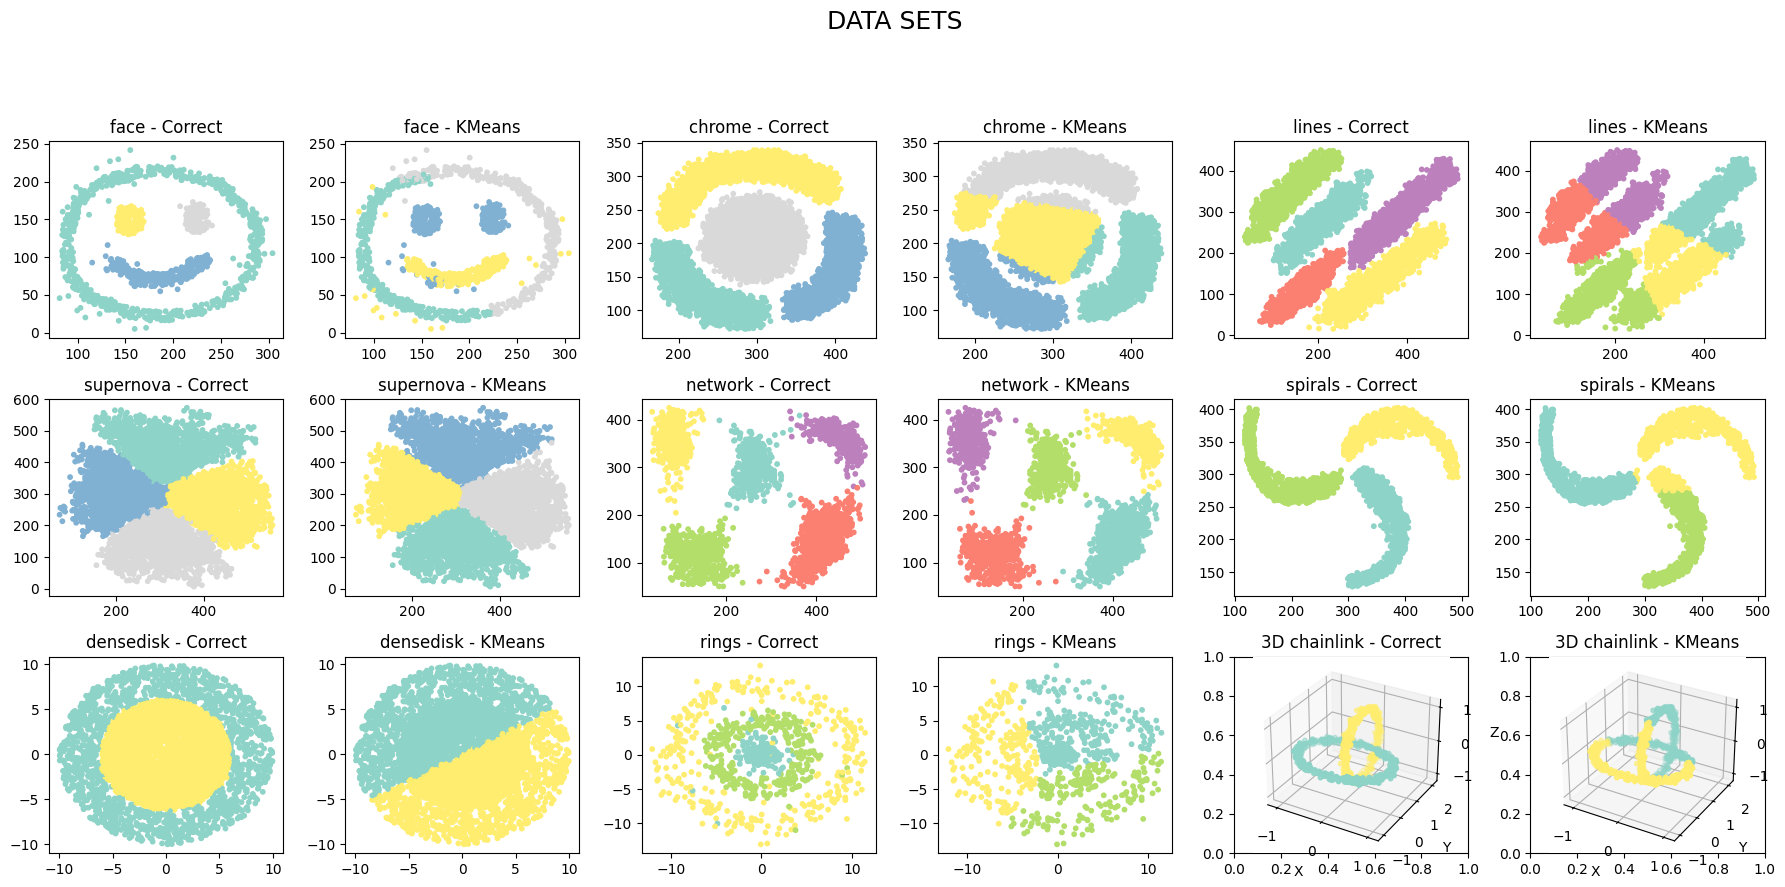

In [786]:
fig, axes = plt.subplots(nrows=3, ncols=6, figsize=(18, 9))
fig.suptitle('DATA SETS\n', size=18)

datasets = [face_df, chrome_df, lines2_df, supernova_df, network_df, spirals_df, densedisk_df, rings_df, chainlink_df]
titles = ["face", "chrome", "lines", "supernova", "network", "spirals", "densedisk", "rings", "chainlink"]
i = 0
j = 0
for df, title in zip(datasets[:-1], titles[:-1]):
    axes[i, j].scatter(df['x'], df['y'], c=df['color'], s=10, cmap="Set3")
    axes[i, j].set_title(f"{title} - Correct")
    axes[i, j+1].scatter(df['x'], df['y'], c=df['Cluster'], s=10, cmap="Set3")
    axes[i, j+1].set_title(f"{title} - KMeans")
    j+=2
    if j == 6:
      i+=1
      j = 0


ax3d_correct = fig.add_subplot(3, 6, 17, projection='3d')
ax3d_correct.scatter(chainlink_df['x'], chainlink_df['y'], chainlink_df['z'], c=chainlink_df['color'], cmap="Set3", s=10)
ax3d_correct.set_title("3D chainlink - Correct")
ax3d_correct.set_xlabel("X")
ax3d_correct.set_ylabel("Y")
ax3d_correct.set_zlabel("Z")

ax3d_kmeans = fig.add_subplot(3, 6, 18, projection='3d')
ax3d_kmeans.scatter(chainlink_df['x'], chainlink_df['y'], chainlink_df['z'], c=chainlink_df['Cluster'], cmap="Set3", s=10)
ax3d_kmeans.set_title("3D chainlink - KMeans")
ax3d_kmeans.set_xlabel("X")
ax3d_kmeans.set_ylabel("Y")
ax3d_kmeans.set_zlabel("Z")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

## B. Use Agglomerative Clustering to cluster each dataset

1. Create each copy of the dataset for Agglomerative Clustering

In [787]:
face_agg_df = face_df.copy()
chrome_agg_df = chrome_df.copy()
lines2_agg_df = lines2_df.copy()
supernova_agg_df = supernova_df.copy()
network_agg_df = network_df.copy()
spirals_agg_df = spirals_df.copy()
densedisk_agg_df = densedisk_df.copy()
rings_agg_df = rings_df.copy()
chainlink_agg_df = chainlink_df.copy()

2. Drop the "color" column on all datasets

In [788]:
# prompt: Drop the "color" column on all datasets

face_agg_df = face_agg_df.drop(columns=['color'])
chrome_agg_df = chrome_agg_df.drop(columns=['color'])
lines2_agg_df = lines2_agg_df.drop(columns=['color'])
supernova_agg_df = supernova_agg_df.drop(columns=['color'])
network_agg_df = network_agg_df.drop(columns=['color'])
spirals_agg_df = spirals_agg_df.drop(columns=['color'])
densedisk_agg_df = densedisk_agg_df.drop(columns=['color'])
rings_agg_df = rings_agg_df.drop(columns=['color'])
chainlink_agg_df = chainlink_agg_df.drop(columns=['color'])

3. Train a Agglomerative Clustering model for each dataset.

In [789]:
agg_face = AgglomerativeClustering(n_clusters=4)
agg_face.fit(face_agg_df)

agg_chrome = AgglomerativeClustering(n_clusters=4)
agg_chrome.fit(chrome_agg_df)

agg_lines2 = AgglomerativeClustering(n_clusters=5)
agg_lines2.fit(lines2_agg_df)

agg_supernova = AgglomerativeClustering(n_clusters=4)
agg_supernova.fit(supernova_agg_df)

agg_network = AgglomerativeClustering(n_clusters=5)
agg_network.fit(network_agg_df)

agg_spirals = AgglomerativeClustering(n_clusters=3)
agg_spirals.fit(spirals_agg_df)

agg_densedisk = AgglomerativeClustering(n_clusters=2)
agg_densedisk.fit(densedisk_agg_df)

agg_rings = AgglomerativeClustering(n_clusters=3)
agg_rings.fit(rings_agg_df)

agg_chainlink = AgglomerativeClustering(n_clusters=2)
agg_chainlink.fit(chainlink_agg_df)

AgglomerativeClustering()

4. Add a "Cluster" column for each data set

In [790]:
face_df['Cluster'] = agg_face.labels_
chrome_df['Cluster'] = agg_chrome.labels_
lines2_df['Cluster'] = agg_lines2.labels_
supernova_df['Cluster'] = agg_supernova.labels_
network_df['Cluster'] = agg_network.labels_
spirals_df['Cluster'] = agg_spirals.labels_
densedisk_df['Cluster'] = agg_densedisk.labels_
rings_df['Cluster'] = agg_rings.labels_
chainlink_df['Cluster'] = agg_chainlink.labels_

5. Plot the Correct cluster and the Agglomerative cluster

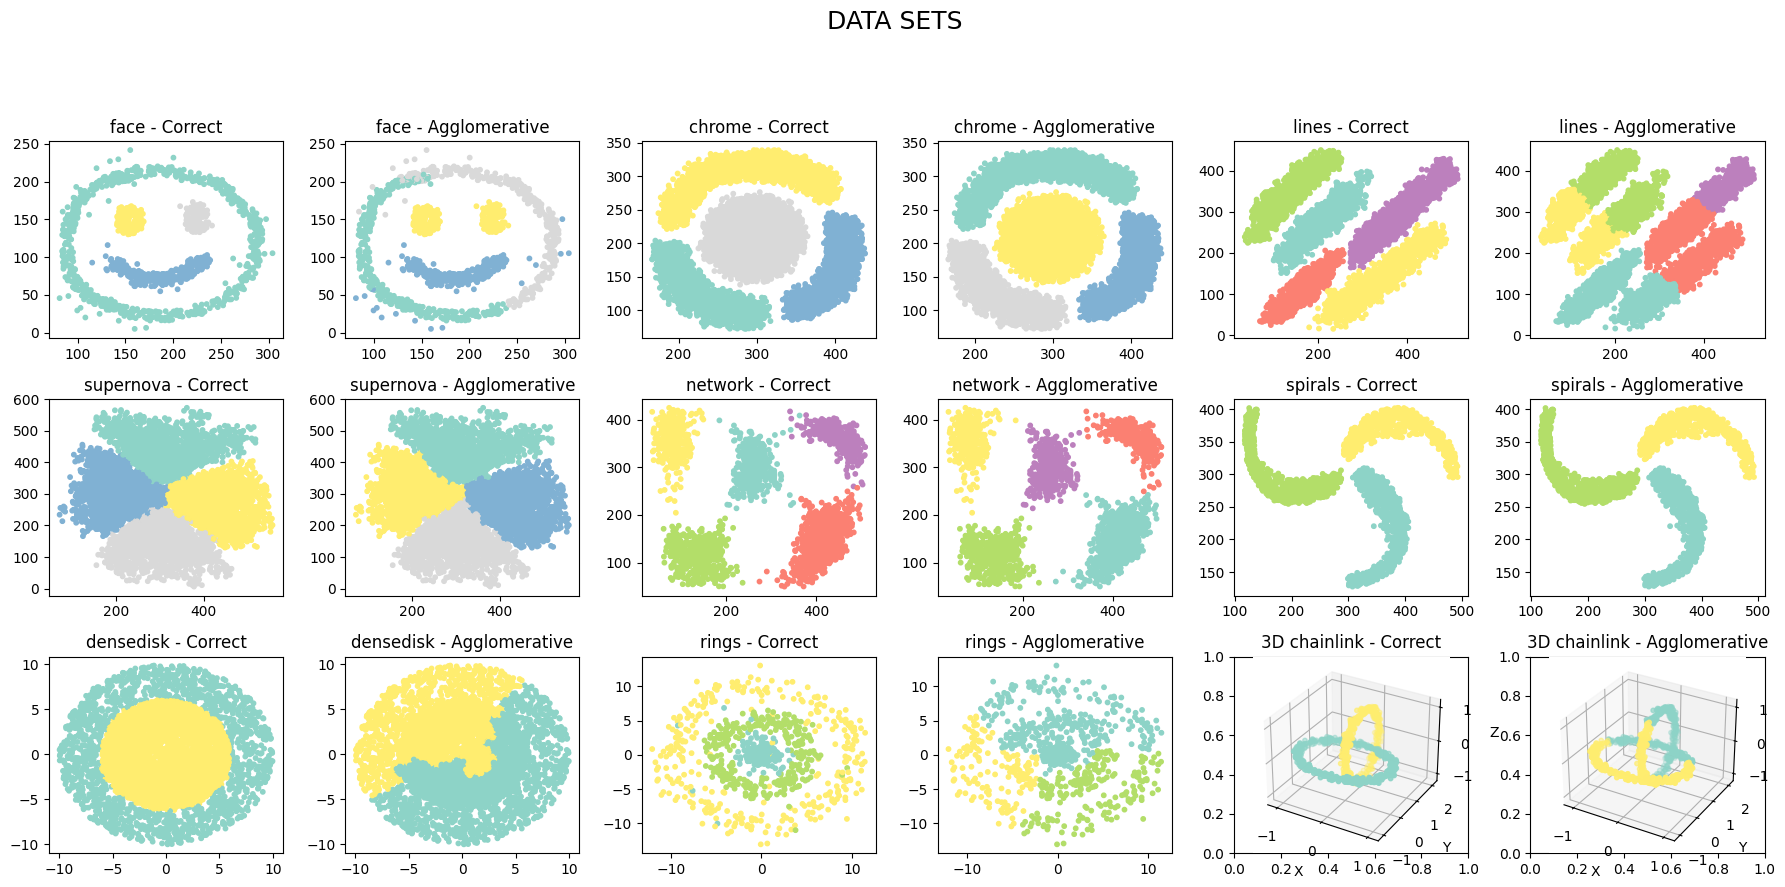

In [791]:
fig, axes = plt.subplots(nrows=3, ncols=6, figsize=(18, 9))
fig.suptitle('DATA SETS\n', size=18)

datasets = [face_df, chrome_df, lines2_df, supernova_df, network_df, spirals_df, densedisk_df, rings_df, chainlink_df]
titles = ["face", "chrome", "lines", "supernova", "network", "spirals", "densedisk", "rings", "chainlink"]
i = 0
j = 0
for df, title in zip(datasets[:-1], titles[:-1]):
    axes[i, j].scatter(df['x'], df['y'], c=df['color'], s=10, cmap="Set3")
    axes[i, j].set_title(f"{title} - Correct")
    axes[i, j+1].scatter(df['x'], df['y'], c=df['Cluster'], s=10, cmap="Set3")
    axes[i, j+1].set_title(f"{title} - Agglomerative")
    j+=2
    if j == 6:
      i+=1
      j = 0


ax3d_correct = fig.add_subplot(3, 6, 17, projection='3d')
ax3d_correct.scatter(chainlink_df['x'], chainlink_df['y'], chainlink_df['z'], c=chainlink_df['color'], cmap="Set3", s=10)
ax3d_correct.set_title("3D chainlink - Correct")
ax3d_correct.set_xlabel("X")
ax3d_correct.set_ylabel("Y")
ax3d_correct.set_zlabel("Z")

ax3d_agg = fig.add_subplot(3, 6, 18, projection='3d')
ax3d_agg.scatter(chainlink_df['x'], chainlink_df['y'], chainlink_df['z'], c=chainlink_df['Cluster'], cmap="Set3", s=10)
ax3d_agg.set_title("3D chainlink - Agglomerative")
ax3d_agg.set_xlabel("X")
ax3d_agg.set_ylabel("Y")
ax3d_agg.set_zlabel("Z")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

## C. Use DBSCAN to cluster each dataset

1. Create each copy of the dataset for DBSCAN Clustering

In [792]:
datasets_dbscan = {
    "face": face_df.copy(),
    "chrome": chrome_df.copy(),
    "lines2": lines2_df.copy(),
    "supernova": supernova_df.copy(),
    "network": network_df.copy(),
    "spirals": spirals_df.copy(),
    "densedisk": densedisk_df.copy(),
    "rings": rings_df.copy(),
    "chainlink": chainlink_df.copy()
}

2. Drop the "color" column on all datasets

In [793]:
for name, df in datasets_dbscan.items():
    datasets_dbscan[name] = df.drop(columns=["color"])

3. Train a DBSCAN Clustering model for each dataset.

In [794]:
dbscan_models = {}
best_params = {
    "face": (9, 3),
    "chrome": (13, 45),
    "lines2": (15.5, 14),
    "supernova": (1.5, 10),
    "network": (6.79, 22),
    "spirals": (5.7, 4),
    "densedisk": (0.40162233, 12),
    "rings": (0.1, 7),
    "chainlink": (0.5, 5)
}

for name, df in datasets_dbscan.items():
    eps, min_samples = best_params[name]

    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    if name == "chainlink":
        dbscan.fit(df[["x", "y", "z"]])
    else:
        dbscan.fit(df[["x", "y"]])
    dbscan_models[name] = dbscan

4. Add a "Cluster" column for each data set

In [795]:
# prompt: Add a "Cluster" column for each data set (dbscan cluster)

# 4. Add a "Cluster" column for each data set
for name, df in datasets_dbscan.items():
    if name == "chainlink":
        datasets_dbscan[name]['Cluster'] = dbscan_models[name].labels_
    else:
        datasets_dbscan[name]['Cluster'] = dbscan_models[name].labels_

5. Plot the correct Cluster and the DBSCAN Cluster


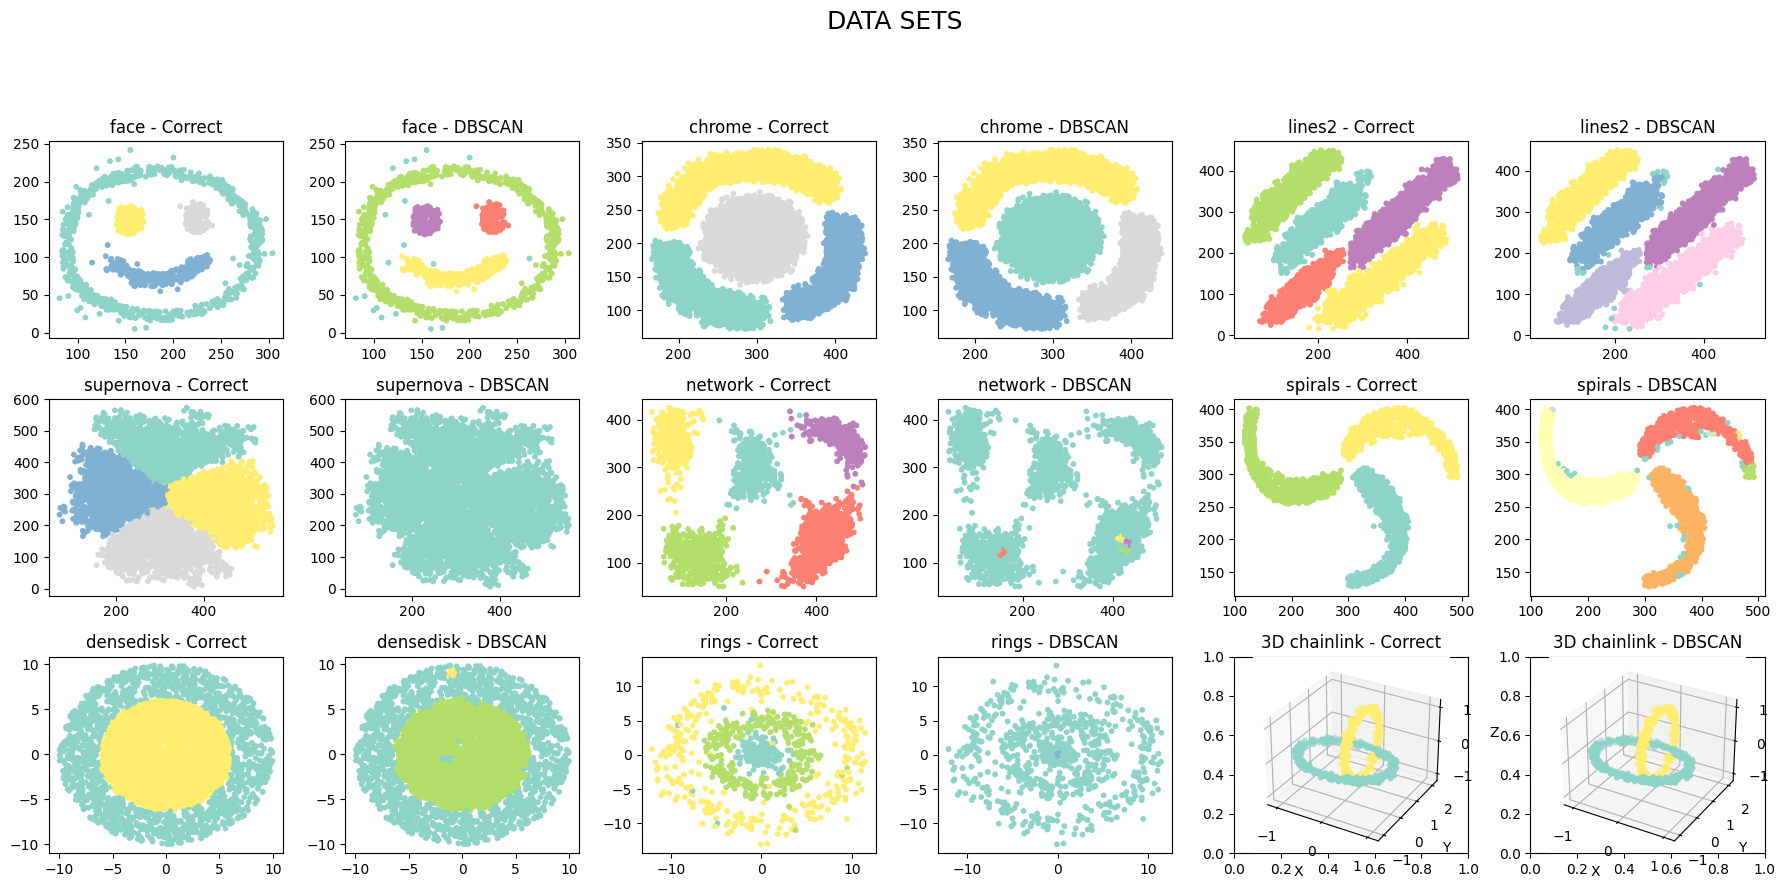

In [796]:
# prompt: plot also the DBSCAN cluster that will look exactly in the correct cluster. Please format in the way that it will compare each plot side by side (the correct cluster and the DBSCAN cluster) for each data set

# 5. Plot the correct Cluster and the DBSCAN Cluster
fig, axes = plt.subplots(nrows=3, ncols=6, figsize=(18, 9))
fig.suptitle('DATA SETS\n', size=18)

datasets = ["face", "chrome", "lines2", "supernova", "network", "spirals", "densedisk", "rings", "chainlink"]
i = 0
j = 0
for name in datasets[:-1]:
    axes[i, j].scatter(datasets_dbscan[name]['x'], datasets_dbscan[name]['y'], c=eval(f"{name}_df['color']"), s=10, cmap="Set3")
    axes[i, j].set_title(f"{name} - Correct")
    axes[i, j+1].scatter(datasets_dbscan[name]['x'], datasets_dbscan[name]['y'], c=datasets_dbscan[name]['Cluster'], s=10, cmap="Set3")
    axes[i, j+1].set_title(f"{name} - DBSCAN")
    j+=2
    if j == 6:
      i+=1
      j = 0

ax3d_correct = fig.add_subplot(3, 6, 17, projection='3d')
ax3d_correct.scatter(datasets_dbscan["chainlink"]['x'], datasets_dbscan["chainlink"]['y'], datasets_dbscan["chainlink"]['z'], c=chainlink_df['color'], cmap="Set3", s=10)
ax3d_correct.set_title("3D chainlink - Correct")
ax3d_correct.set_xlabel("X")
ax3d_correct.set_ylabel("Y")
ax3d_correct.set_zlabel("Z")

ax3d_dbscan = fig.add_subplot(3, 6, 18, projection='3d')
ax3d_dbscan.scatter(datasets_dbscan["chainlink"]['x'], datasets_dbscan["chainlink"]['y'], datasets_dbscan["chainlink"]['z'], c=datasets_dbscan["chainlink"]['Cluster'], cmap="Set3", s=10)
ax3d_dbscan.set_title("3D chainlink - DBSCAN")
ax3d_dbscan.set_xlabel("X")
ax3d_dbscan.set_ylabel("Y")
ax3d_dbscan.set_zlabel("Z")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

## D. Compare all algorithms

1. Display the Correct cluster, K-means cluster, Agglomerative cluster and DBSCAN cluster in a single plot.

- Each row should contain each dataset
- Each column should contain each the correct cluster, k-means cluster, agglomerative cluster and DBSCAN cluster.

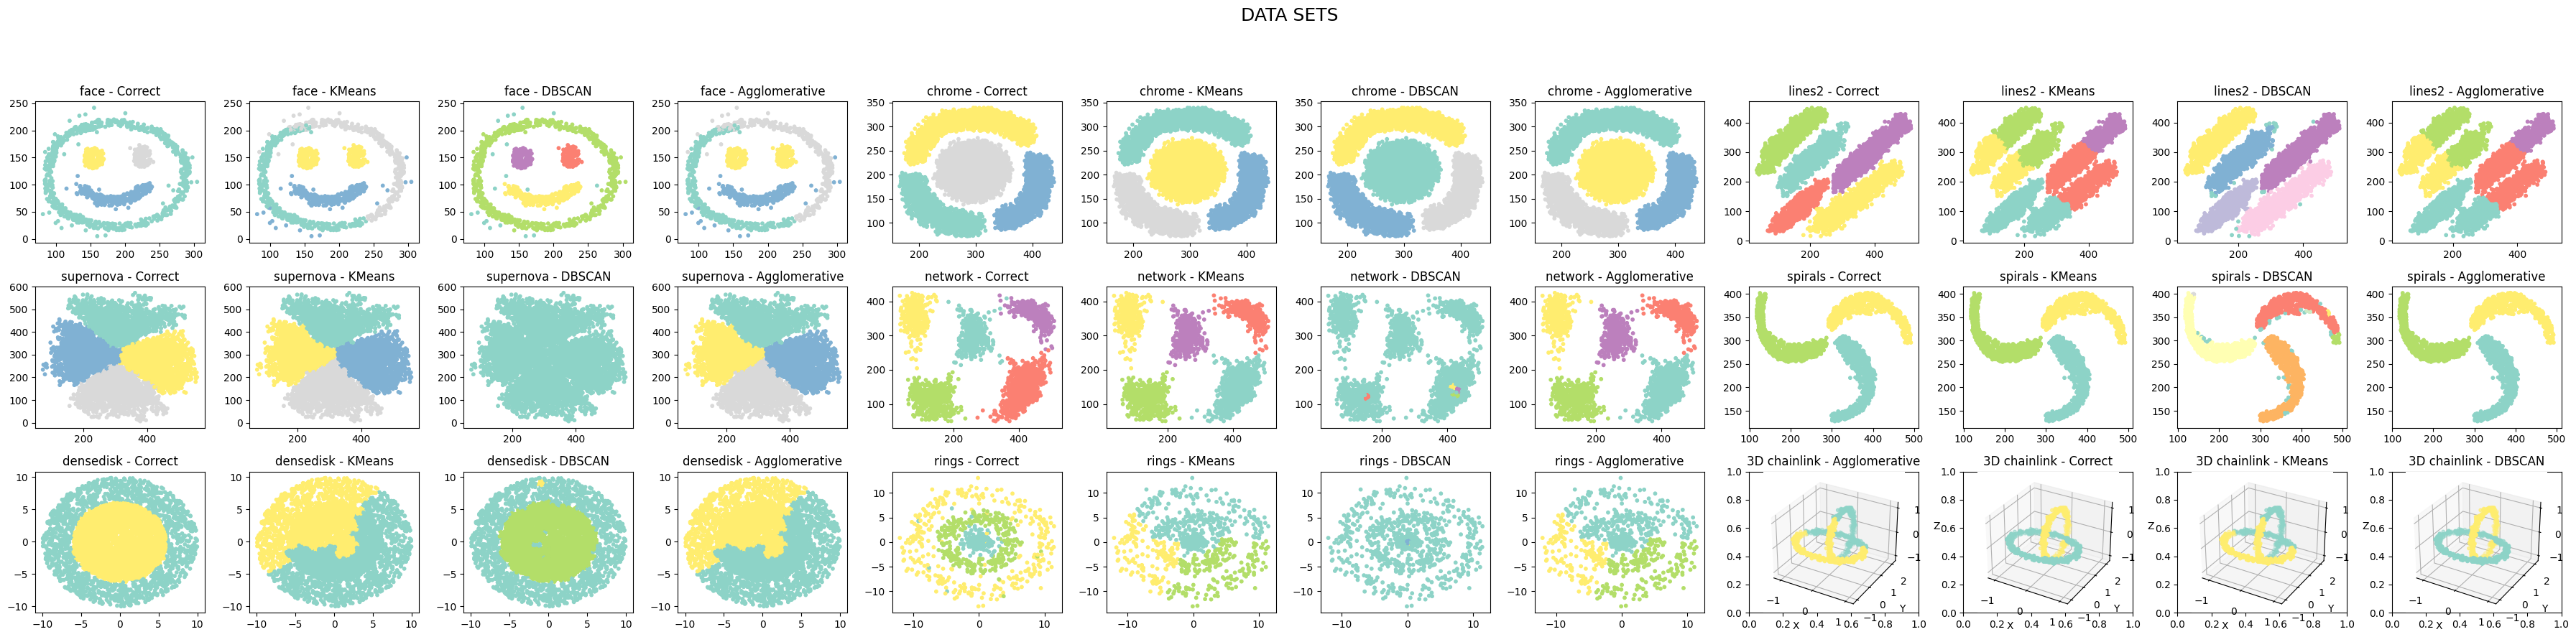

In [802]:
fig, axes = plt.subplots(nrows=3, ncols=12, figsize=(36, 9))
fig.suptitle('DATA SETS\n', size=18)

datasets = ["face", "chrome", "lines2", "supernova", "network", "spirals", "densedisk", "rings", "chainlink"]
i = 0
j = 0
for name in datasets[:-1]:
    axes[i, j].scatter(eval(f"{name}_df")['x'], eval(f"{name}_df")['y'], c=eval(f"{name}_df['color']"), s=10, cmap="Set3")
    axes[i, j].set_title(f"{name} - Correct")
    axes[i, j+1].scatter(eval(f"{name}_df")['x'], eval(f"{name}_df")['y'], c=eval(f"{name}_df['Cluster']"), s=10, cmap="Set3")
    axes[i, j+1].set_title(f"{name} - KMeans")
    axes[i, j+2].scatter(eval(f"{name}_df")['x'], eval(f"{name}_df")['y'], c=datasets_dbscan[name]['Cluster'], s=10, cmap="Set3")
    axes[i, j+2].set_title(f"{name} - DBSCAN")

    # Agglomerative plot
    axes[i, j+3].scatter(eval(f"{name}_df")['x'], eval(f"{name}_df")['y'], c=eval(f"{name}_df['Cluster']"), s=10, cmap="Set3")
    axes[i, j+3].set_title(f"{name} - Agglomerative")

    j+=4
    if j == 12:
      i+=1
      j = 0

# Correct the index for ax3d_agg
ax3d_correct = fig.add_subplot(3, 12, 34, projection='3d')
ax3d_correct.scatter(chainlink_df['x'], chainlink_df['y'], chainlink_df['z'], c=chainlink_df['color'], cmap="Set3", s=10)
ax3d_correct.set_title("3D chainlink - Correct")
ax3d_correct.set_xlabel("X")
ax3d_correct.set_ylabel("Y")
ax3d_correct.set_zlabel("Z")

ax3d_kmeans = fig.add_subplot(3, 12, 35, projection='3d')
ax3d_kmeans.scatter(chainlink_df['x'], chainlink_df['y'], chainlink_df['z'], c=chainlink_df['Cluster'], cmap="Set3", s=10)
ax3d_kmeans.set_title("3D chainlink - KMeans")
ax3d_kmeans.set_xlabel("X")
ax3d_kmeans.set_ylabel("Y")
ax3d_kmeans.set_zlabel("Z")

ax3d_dbscan = fig.add_subplot(3, 12, 36, projection='3d')
ax3d_dbscan.scatter(datasets_dbscan["chainlink"]['x'], datasets_dbscan["chainlink"]['y'], datasets_dbscan["chainlink"]['z'], c=datasets_dbscan["chainlink"]['Cluster'], cmap="Set3", s=10)
ax3d_dbscan.set_title("3D chainlink - DBSCAN")
ax3d_dbscan.set_xlabel("X")
ax3d_dbscan.set_ylabel("Y")
ax3d_dbscan.set_zlabel("Z")

# Correct the index for ax3d_agg (change from 37 to any valid index between 1 and 36)
ax3d_agg = fig.add_subplot(3, 12, 33, projection='3d') # Changed to 33, choose any suitable index
ax3d_agg.scatter(chainlink_df['x'], chainlink_df['y'], chainlink_df['z'], c=chainlink_df['Cluster'], cmap="Set3", s=10)
ax3d_agg.set_title("3D chainlink - Agglomerative")
ax3d_agg.set_xlabel("X")
ax3d_agg.set_ylabel("Y")
ax3d_agg.set_zlabel("Z")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()